In [1]:
import torch
from torch import nn
from torch.nn import functional as F
import collections
import random
import time
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from grid_method import *
from model import GHH

# norm of gradient in 2D

In [3]:
def norm_2d(x_range, y_range, step, k_range, n_iter):
    avg_ms = []
    avg_stds = []
    for k in k_range:
        stats = torch.empty(n_iter,2)
        for i in range(n_iter):
            d, l = generate_grid(x_range, y_range, step)
            d.requires_grad_(True)
            ghh = GHH(d,2,k)
            output = ghh(d)
            grad_x, grad_y = compute_grad(output, d, l)
            norm = np.sqrt(grad_x**2 + grad_y**2)
            m = norm.mean()
            std = norm.std()
            stats[i,0] = m
            stats[i,1] = std
        avg_m = stats.mean(axis = 0)[0].item()
        avg_std = stats.mean(axis = 0)[1].item()
        avg_ms.append(avg_m)
        avg_stds.append(avg_std)
    return avg_ms, avg_stds

In [17]:
ks_log = np.array([1,5,10,50,100, 500, 1000]);
#ks = np.array([1,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]);
x_range = [-10, 10]; y_range = [-10, 10];
step = 0.1

In [18]:
ks

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [21]:
ms_1, stds_1 = norm_2d(x_range, y_range, step, ks_log, 10)
ms_2, stds_2 = norm_2d(x_range, y_range, step, ks_log, 100)
ms_3, stds_3 = norm_2d(x_range, y_range, step, ks_log, 1000)

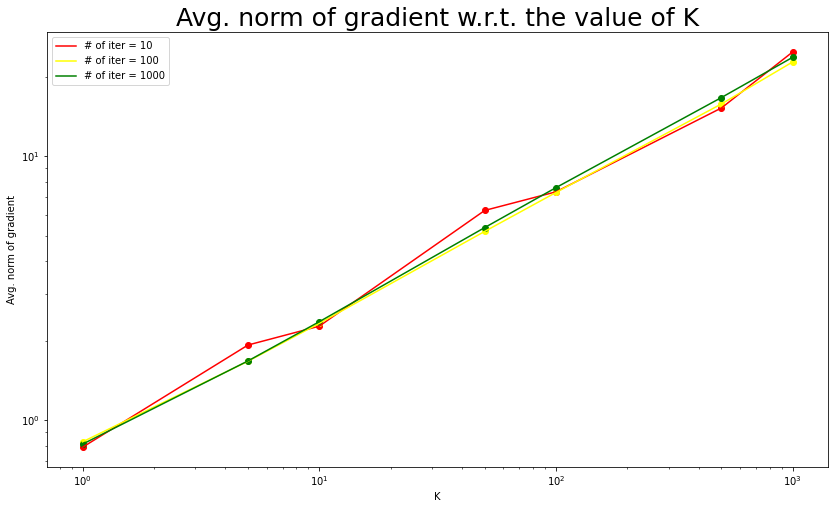

In [25]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ks_log,ms_1, label = '# of iter = 10',c = 'red')
plt.plot(ks_log,ms_2, label = '# of iter = 100',c = 'yellow')
plt.plot(ks_log,ms_3, label = '# of iter = 1000',c = 'green')

plt.legend()
plt.scatter(ks_log, ms_1, c = 'red') 
plt.scatter(ks_log, ms_2, c = 'yellow') 
plt.scatter(ks_log, ms_3, c = 'green') 

plt.loglog()
plt.xlabel("K")
plt.ylabel("Avg. norm of gradient")
plt.title("Avg. norm of gradient w.r.t. the value of K",fontsize=25)
plt.show()

In [30]:
ks_log = np.array([1,2,5,10,20,50,100, 200,500, 1000]);
x_range = [-10, 10]; y_range = [-10, 10];
step = 0.1

In [31]:
ks_log

array([   1,    2,    5,   10,   20,   50,  100,  200,  500, 1000])

In [32]:
ms_1, stds_1 = norm_2d(x_range, y_range, step, ks_log, 10)
print('1, finished')
ms_2, stds_2 = norm_2d(x_range, y_range, step, ks_log, 100)
print('2, finished')
ms_3, stds_3 = norm_2d(x_range, y_range, step, ks_log, 1000)
print('3, finished')

1, finished
2, finished
3, finished


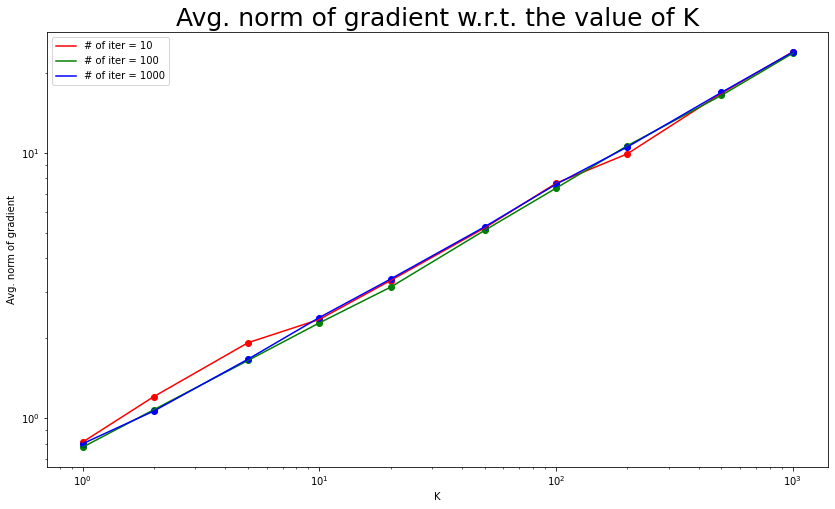

In [36]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ks_log,ms_1, label = '# of iter = 10',c = 'red')
plt.plot(ks_log,ms_2, label = '# of iter = 100',c = 'green')
plt.plot(ks_log,ms_3, label = '# of iter = 1000',c = 'blue')

plt.legend()
plt.scatter(ks_log, ms_1, c = 'red') 
plt.scatter(ks_log, ms_2, c = 'green') 
plt.scatter(ks_log, ms_3, c = 'blue') 

plt.loglog()
plt.xlabel("K")
plt.ylabel("Avg. norm of gradient")
plt.title("Avg. norm of gradient w.r.t. the value of K",fontsize=25)
plt.show()

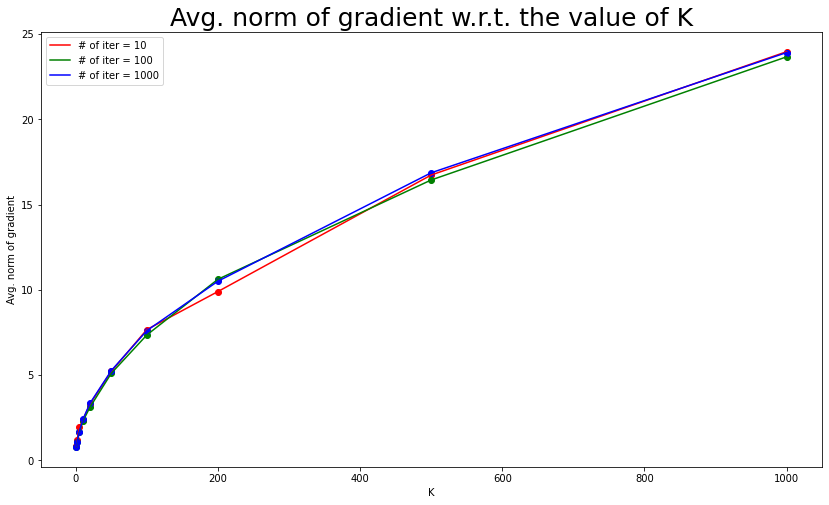

In [37]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ks_log,ms_1, label = '# of iter = 10',c = 'red')
plt.plot(ks_log,ms_2, label = '# of iter = 100',c = 'green')
plt.plot(ks_log,ms_3, label = '# of iter = 1000',c = 'blue')

plt.legend()
plt.scatter(ks_log, ms_1, c = 'red') 
plt.scatter(ks_log, ms_2, c = 'green') 
plt.scatter(ks_log, ms_3, c = 'blue') 

plt.xlabel("K")
plt.ylabel("Avg. norm of gradient")
plt.title("Avg. norm of gradient w.r.t. the value of K",fontsize=25)
plt.show()

# distribution of the norm of gradient in 2D

# for different architecture

In [4]:
def get_region_1d(grad):
    grad_n = grad.numpy()
    grad_n = grad_n.reshape(-1)
    sp = grad_n.shape
    grad_n = grad_n.astype(str)
    _, dist = np.unique(grad_n, return_inverse = True)
    dist = dist.reshape(sp)
    return dist

In [5]:
def view_1d(d, output, region):
    d_n = d.detach().numpy().reshape(-1)
    output_n = output.detach().numpy().reshape(-1)
    n_region = len(set(region))
    regions = list(set(region))
    # choose colors
    cmp = plt.get_cmap("viridis")
    colors = cmp(np.linspace(0,1,n_region))
                 
    fig = plt.figure(figsize=(14, 8))
    
    plt.plot(d_n,output_n)
    for i, (r, color) in enumerate(zip(regions, colors), 1):
        ids = np.arange(len(d_n))
        ids_c = ids[region == r]
        d_n_c = d_n[ids_c]
        output_n_c = output_n[ids_c]
        plt.scatter(d_n_c, output_n_c, s=1)
        plt.axvspan(d_n_c[0], d_n_c[-1], facecolor=color, alpha=0.5)         
    plt.xlabel("x")
    plt.ylabel("output of GHH")
    plt.title("1D visualization",fontsize=25)
    plt.show()

### first architecture
![1st_arch](./001.png)

In [93]:
def arch_1_abandoned(d, k):
    ghh1 = GHH(d,1,k)
    ghh2 = GHH(d,1,k)
    ghh3 = GHH(d,1,k)
    ghh4 = GHH(d,1,k)
    ghh5 = GHH(d,1,k)
    ghh6 = GHH(d,1,k)
    
    res1 = ghh1(d)
    res2 = ghh2(res1)
    res3 = ghh3(res2)
    res4 = ghh4(res3)
    res5 = ghh5(res4)
    output = ghh6(res5)
    return output

In [6]:
def arch_1(d, k, l):
    ghh1 = GHH(d,1,k)
    res = ghh1(d)
    
    for i in range(l-1):
        ghh = GHH(d,1,k)
        res = res.clone()
        res = ghh(res)
        
    output = res.clone()
    return output

### an example of such architecture

In [28]:
d = torch.linspace(-20, 20, 2001)
d = d.reshape(-1,1)
d.requires_grad_(True)

output = arch_1(d, 3, 1)
output.backward(torch.ones_like(output))

grad = d.grad
reg = get_region_1d(grad)

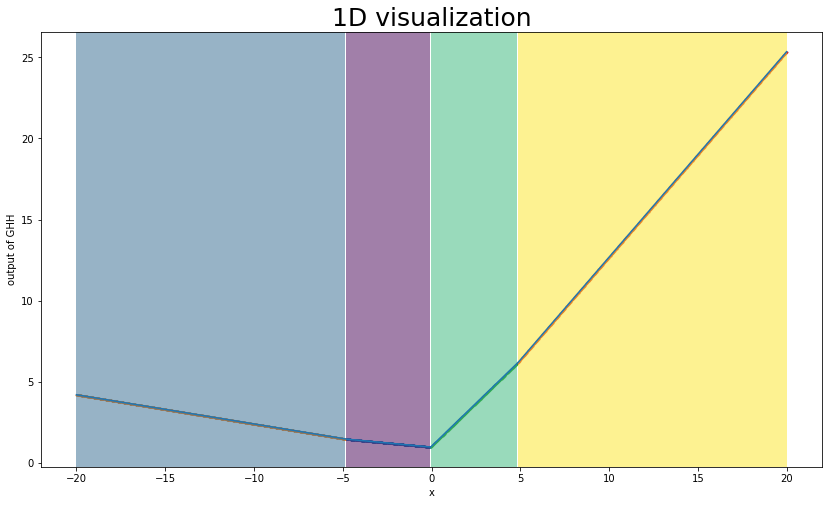

In [29]:
view_1d(d, output, reg)

In [30]:
nb_region = len(set(reg.flatten()))
print(f'{nb_region} regions in the chosen area.')

4 regions in the chosen area.


In [101]:
d = torch.linspace(-20, 20, 2001)
d = d.reshape(-1,1)
d.requires_grad_(True)

output = arch_1(d, 3, 6)
output.backward(torch.ones_like(output))

grad = d.grad
reg = get_region_1d(grad)

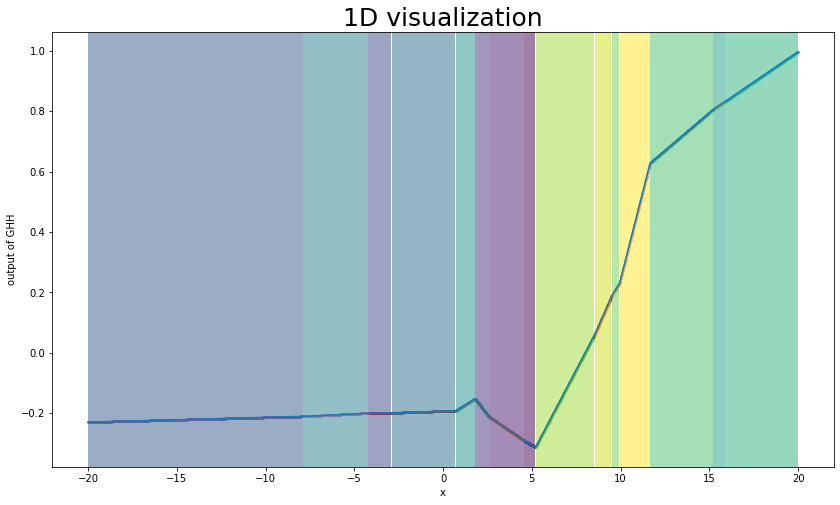

In [102]:
view_1d(d, output, reg)

In [103]:
nb_region = len(set(reg.flatten()))
print(f'{nb_region} regions in the chosen area.')

15 regions in the chosen area.


### variation of the # of regions w.r.t. the value of K, given the # of 'layers'

In [104]:
def nb_region_arch1(ks, n_iter):
    avg_nbs = []
    for k in ks:
        stats = torch.empty(n_iter, 1)
        for i in range(n_iter):
            d = torch.linspace(-20, 20, 2001)
            d = d.reshape(-1, 1)
            d.requires_grad_(True)
            output = arch_1(d, k, 6)
            output.backward(torch.ones_like(output))
            grad = d.grad.numpy().reshape(-1)
            
            stats[i,0] = len(set(grad))
        avg_nb = stats.mean(axis = 0)[0].item()
        avg_nbs.append(avg_nb)
        
    return avg_nbs

In [117]:
ks = np.arange(0,101,10)
ks[0] = 1
ks

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [118]:
nbs_1 = nb_region_arch1(ks, 10)
print('1, finished')
nbs_2 = nb_region_arch1(ks, 100)
print('2, finished')
nbs_3 = nb_region_arch1(ks, 1000)
print('3, finished')

1, finished
2, finished
3, finished


In [ ]:
nbs_4 = nb_region_arch1(ks, 10000)
print('4, finished')

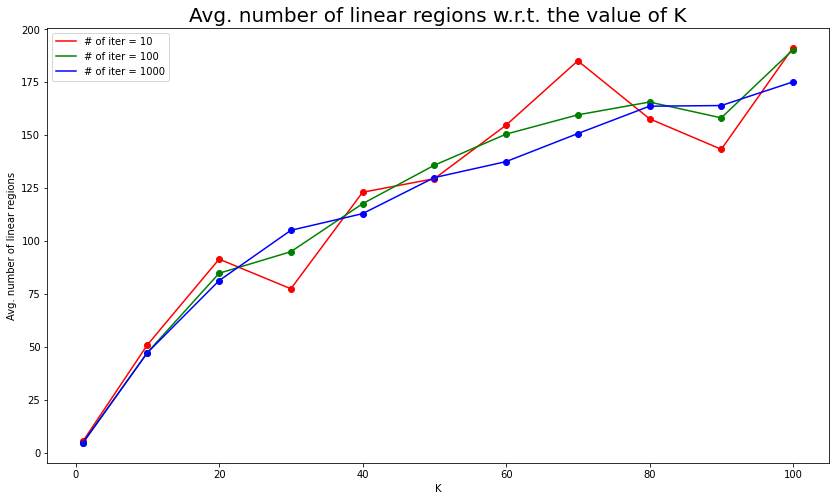

In [140]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ks,nbs_1, label = '# of iter = 10',c = 'red')
plt.plot(ks,nbs_2, label = '# of iter = 100',c = 'green')
plt.plot(ks,nbs_3, label = '# of iter = 1000',c = 'blue')

plt.legend()
plt.scatter(ks, nbs_1, c = 'red') 
plt.scatter(ks, nbs_2, c = 'green') 
plt.scatter(ks, nbs_3, c = 'blue') 

plt.xlabel("K")
plt.ylabel("Avg. number of linear regions")
plt.title("Avg. number of linear regions w.r.t. the value of K",fontsize=20)
plt.show()

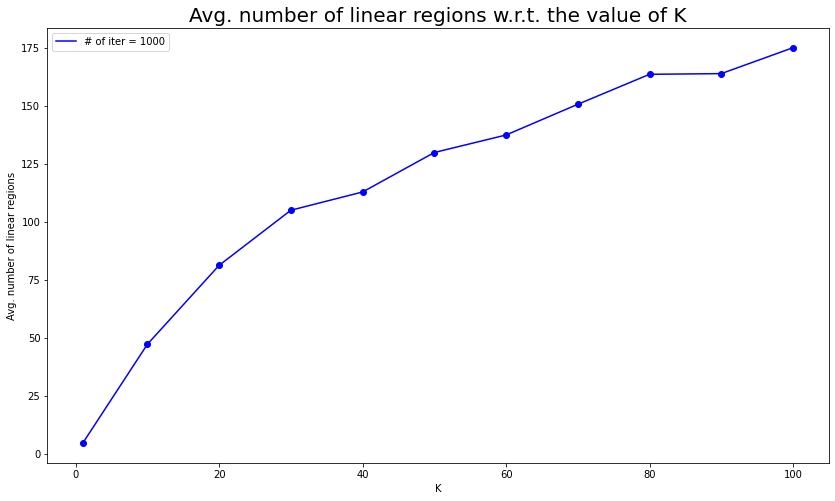

In [141]:
fig = plt.figure(figsize=(14, 8))

plt.plot(ks,nbs_3, label = '# of iter = 1000',c = 'blue')

plt.legend()
plt.scatter(ks, nbs_3, c = 'blue') 

plt.xlabel("K")
plt.ylabel("Avg. number of linear regions")
plt.title("Avg. number of linear regions w.r.t. the value of K",fontsize=20)
plt.show()

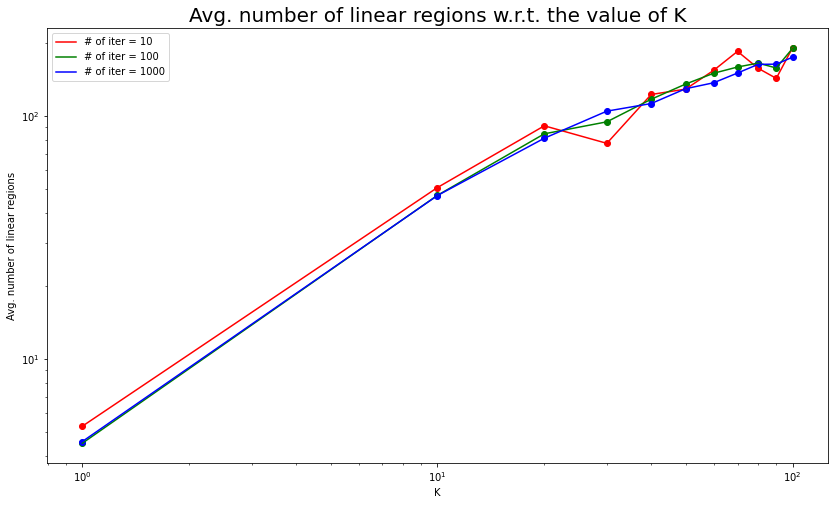

In [138]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ks,nbs_1, label = '# of iter = 10',c = 'red')
plt.plot(ks,nbs_2, label = '# of iter = 100',c = 'green')
plt.plot(ks,nbs_3, label = '# of iter = 1000',c = 'blue')

plt.legend()
plt.scatter(ks, nbs_1, c = 'red') 
plt.scatter(ks, nbs_2, c = 'green') 
plt.scatter(ks, nbs_3, c = 'blue') 

plt.loglog()
plt.xlabel("K")
plt.ylabel("Avg. number of linear regions")
plt.title("Avg. number of linear regions w.r.t. the value of K",fontsize=20)
plt.show()

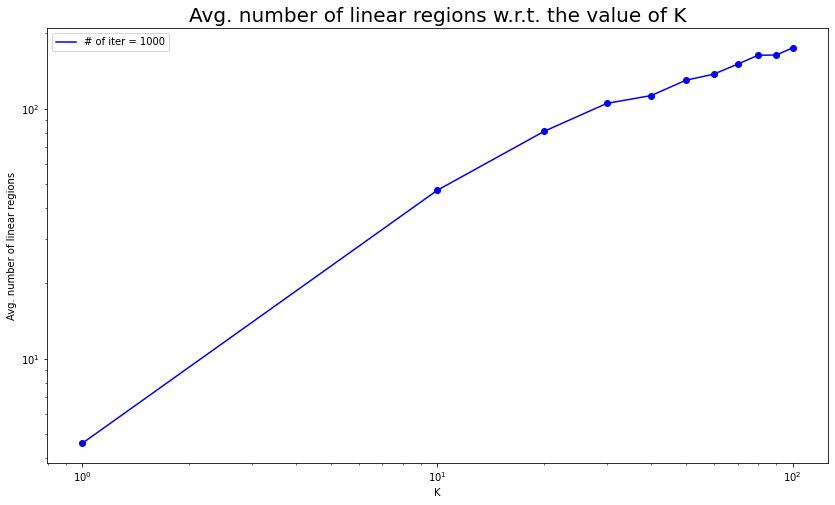

In [139]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ks,nbs_3, label = '# of iter = 1000',c = 'blue')

plt.legend()
plt.scatter(ks, nbs_3, c = 'blue') 

plt.loglog()
plt.xlabel("K")
plt.ylabel("Avg. number of linear regions")
plt.title("Avg. number of linear regions w.r.t. the value of K",fontsize=20)
plt.show()

### variation of the # of regions w.r.t. the # of layers, given the value of K

In [135]:
def nb_region_wrtl_arch1(ls, n_iter):
    avg_nbs = []
    for l in ls:
        stats = torch.empty(n_iter, 1)
        for i in range(n_iter):
            d = torch.linspace(-20, 20, 2001)
            d = d.reshape(-1, 1)
            d.requires_grad_(True)
            output = arch_1(d, 3, l)
            output.backward(torch.ones_like(output))
            grad = d.grad.numpy().reshape(-1)
            
            stats[i,0] = len(set(grad))
        avg_nb = stats.mean(axis = 0)[0].item()
        avg_nbs.append(avg_nb)
        
    return avg_nbs

In [136]:
ls = np.arange(0,101,5)
ls[0] = 1
ls

array([  1,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

In [137]:
nbs_l_1 = nb_region_wrtl_arch1(ls, 10)
print('1, finished')
nbs_l_2 = nb_region_wrtl_arch1(ls, 100)
print('2, finished')
nbs_l_3 = nb_region_wrtl_arch1(ls, 1000)
print('3, finished')

1, finished
2, finished
3, finished


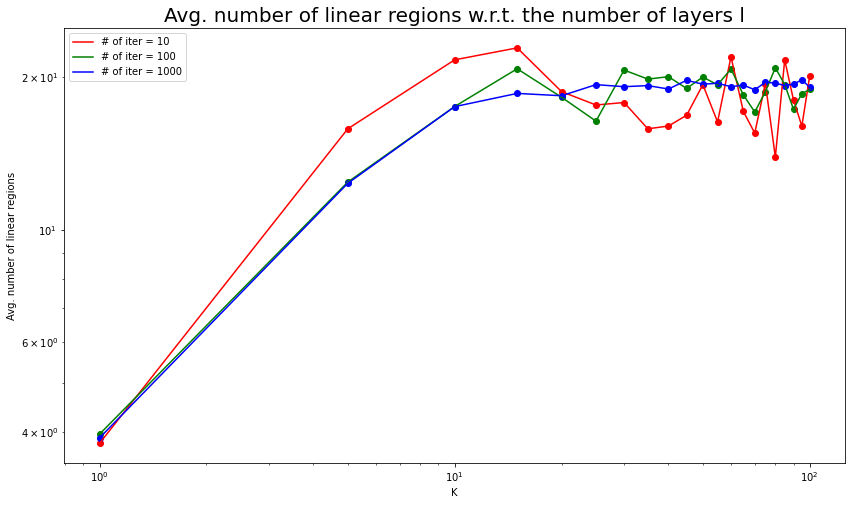

In [142]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ls,nbs_l_1, label = '# of iter = 10',c = 'red')
plt.plot(ls,nbs_l_2, label = '# of iter = 100',c = 'green')
plt.plot(ls,nbs_l_3, label = '# of iter = 1000',c = 'blue')

plt.legend()
plt.scatter(ls, nbs_l_1, c = 'red') 
plt.scatter(ls, nbs_l_2, c = 'green') 
plt.scatter(ls, nbs_l_3, c = 'blue') 

plt.loglog()
plt.xlabel("K")
plt.ylabel("Avg. number of linear regions")
plt.title("Avg. number of linear regions w.r.t. the number of layers l",fontsize=20)
plt.show()

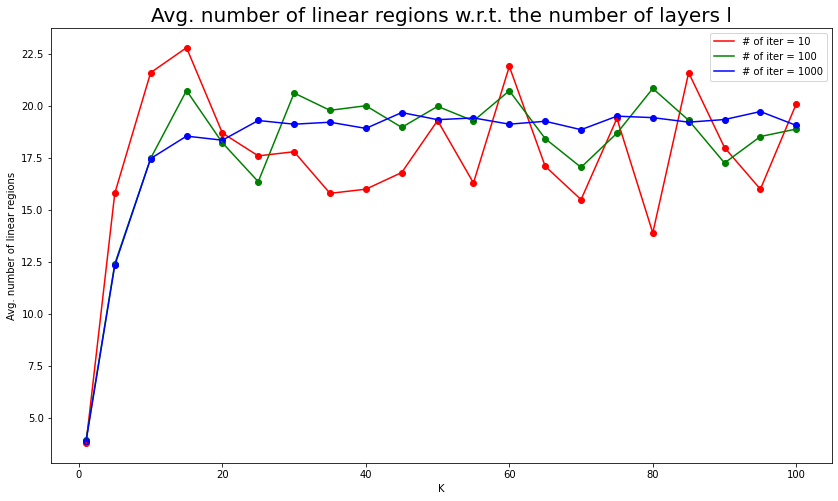

In [143]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ls,nbs_l_1, label = '# of iter = 10',c = 'red')
plt.plot(ls,nbs_l_2, label = '# of iter = 100',c = 'green')
plt.plot(ls,nbs_l_3, label = '# of iter = 1000',c = 'blue')

plt.legend()
plt.scatter(ls, nbs_l_1, c = 'red') 
plt.scatter(ls, nbs_l_2, c = 'green') 
plt.scatter(ls, nbs_l_3, c = 'blue') 

plt.xlabel("K")
plt.ylabel("Avg. number of linear regions")
plt.title("Avg. number of linear regions w.r.t. the number of layers l",fontsize=20)
plt.show()

In [273]:
d = torch.linspace(-20, 20, 2001)
d = d.reshape(-1,1)
d.requires_grad_(True)

output = arch_1(d, 3, 30)
output.backward(torch.ones_like(output))

grad = d.grad
reg = get_region_1d(grad)

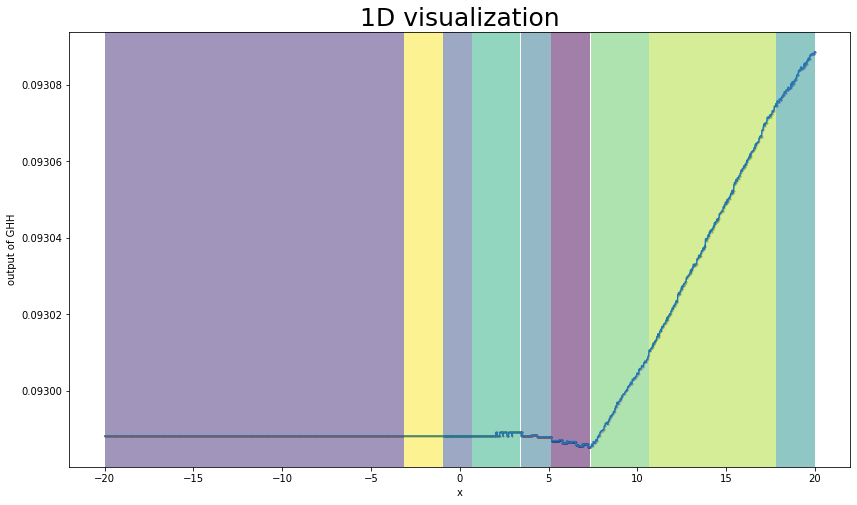

In [274]:
view_1d(d, output, reg)

In [272]:
nb_region = len(set(reg.flatten()))
print(f'{nb_region} regions in the chosen area.')

9 regions in the chosen area.


In [284]:
d = torch.linspace(-2, 2, 2001)
d = d.reshape(-1,1)
d.requires_grad_(True)

output = arch_1(d, 3, 30)
output.backward(torch.ones_like(output))

grad = d.grad
reg = get_region_1d(grad)

In [294]:
grad_test = grad.flatten().detach().numpy()

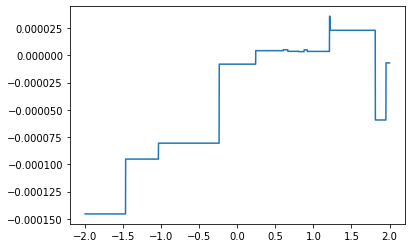

In [295]:
plt.plot(d.detach().numpy(), grad_test)

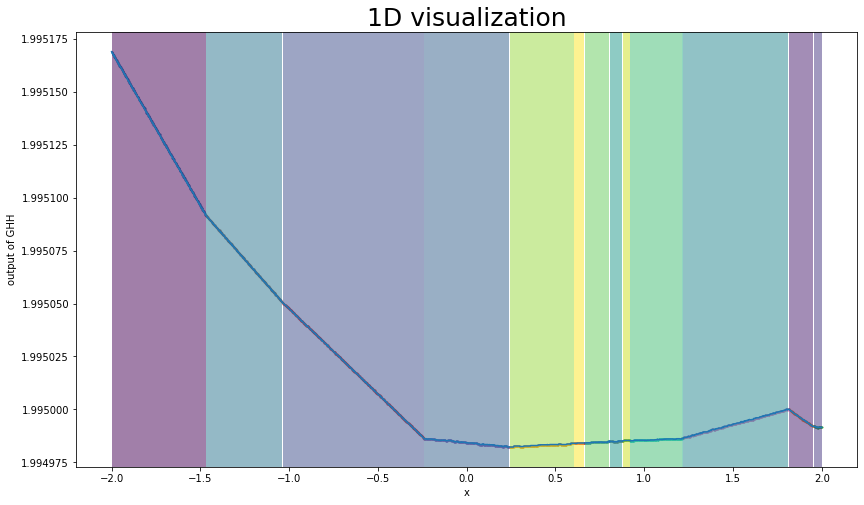

In [285]:
view_1d(d, output, reg)

In [286]:
nb_region = len(set(reg.flatten()))
print(f'{nb_region} regions in the chosen area.')

14 regions in the chosen area.


### second architecture
![2nd_archi](./002.png)

In [196]:
def arch_2(d, k, l):
    ghh1 = GHH(d,2,k)
    res = ghh1(d)
    
    for i in range(l-1):
        ghh = GHH(res,1,k)
        res = res.clone()
        res = ghh(res)
        
    output = res.clone()
    return output

### an example of such architecture

In [197]:
x_range = [-10,10]
y_range = [-10,10]
step = 0.01

In [206]:
d, ll = generate_grid([-10,10], [-10, 10], 0.01)
d.requires_grad_(True)

output = arch_2(d, 1, 1)

grad_x, grad_y = compute_grad(output, d, ll)
reg = get_region_fast(grad_x, grad_y)

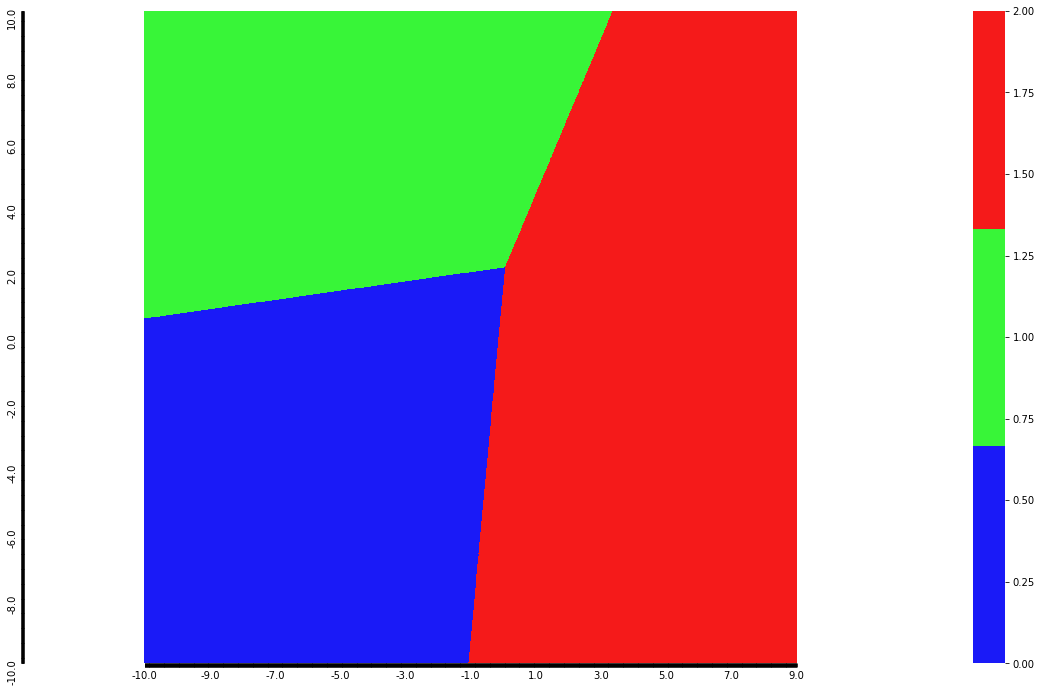

In [207]:
view_2d(x_range, y_range, step, reg)

In [208]:
nb_region = len(set(reg.flatten()))
print(f'{nb_region} regions in the chosen area.')

3 regions in the chosen area.


In [211]:
d, ll = generate_grid([-10,10], [-10, 10], 0.01)
d.requires_grad_(True)

output = arch_2(d, 3, 1)

grad_x, grad_y = compute_grad(output, d, ll)
reg = get_region_fast(grad_x, grad_y)

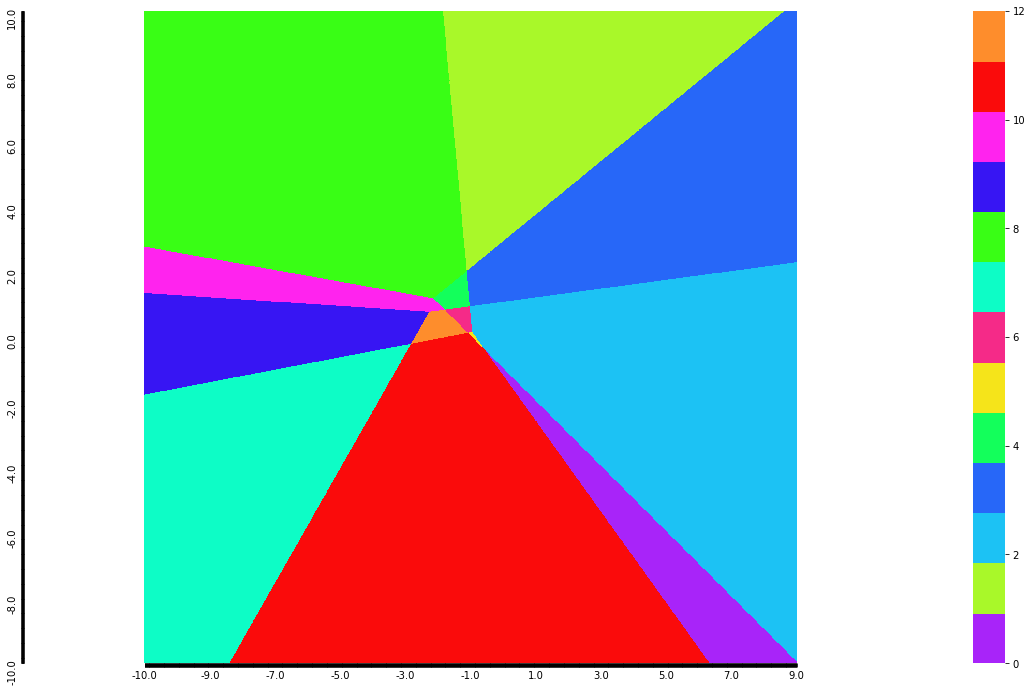

In [212]:
view_2d(x_range, y_range, step, reg)

In [213]:
nb_region = len(set(reg.flatten()))
print(f'{nb_region} regions in the chosen area.')

13 regions in the chosen area.


In [214]:
d, ll = generate_grid([-10,10], [-10, 10], 0.01)
d.requires_grad_(True)

output = arch_2(d, 3, 4)

grad_x, grad_y = compute_grad(output, d, ll)
reg = get_region_fast(grad_x, grad_y)

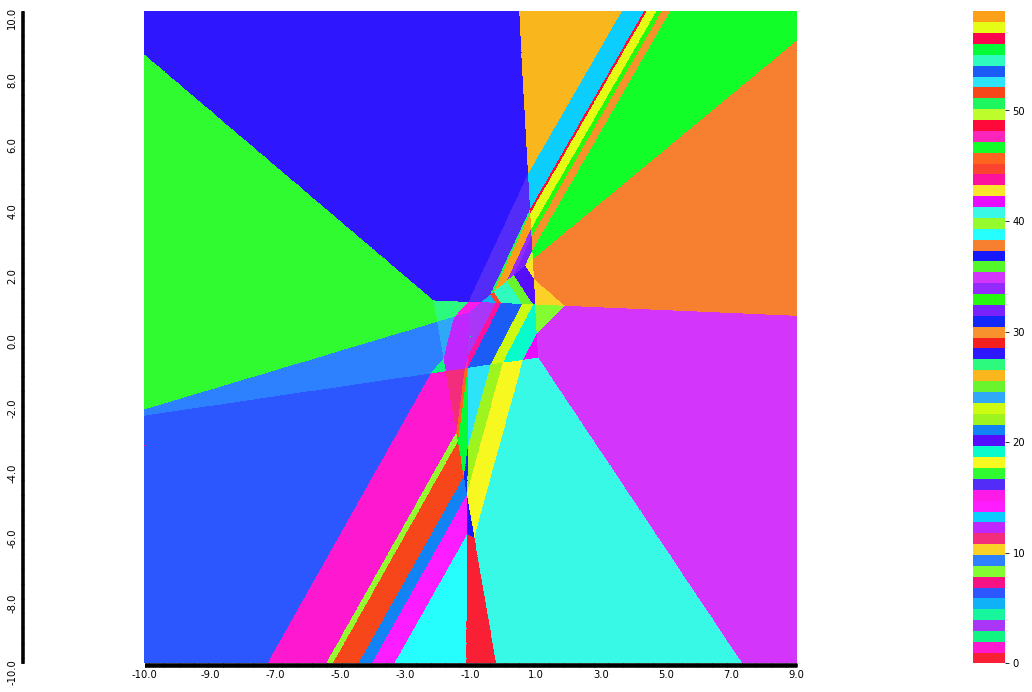

In [215]:
view_2d(x_range, y_range, step, reg)

In [216]:
nb_region = len(set(reg.flatten()))
print(f'{nb_region} regions in the chosen area.')

60 regions in the chosen area.


In [241]:
d, ll = generate_grid([-10,10], [-10, 10], 0.01)
d.requires_grad_(True)

output = arch_2(d, 3, 20)

grad_x, grad_y = compute_grad(output, d, ll)
reg = get_region_fast(grad_x, grad_y)

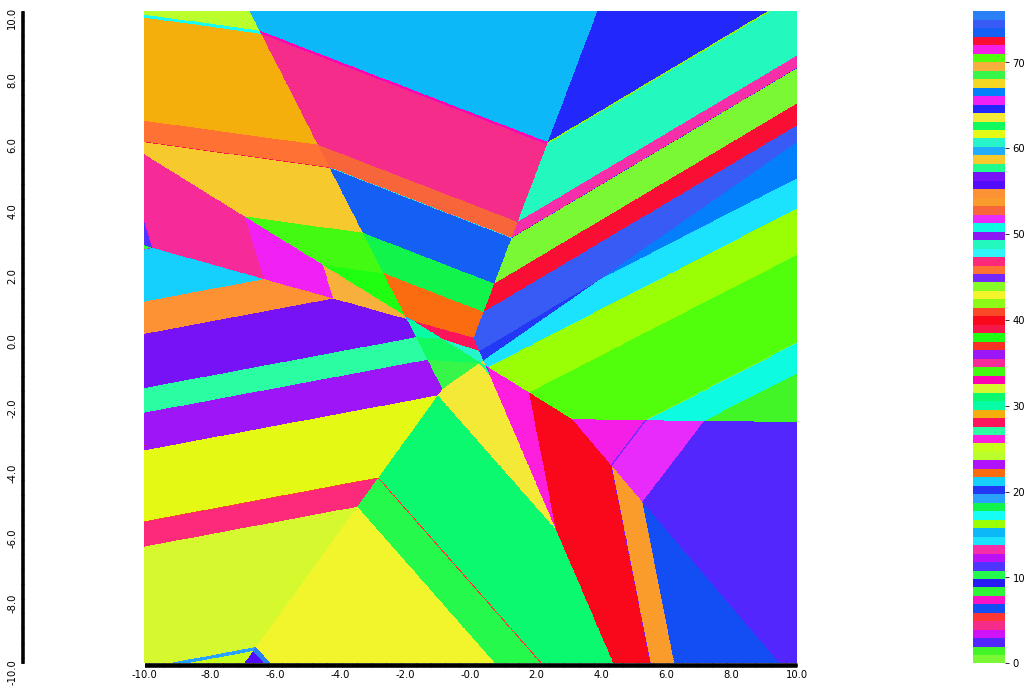

In [242]:
view_2d(x_range, y_range, step, reg)

In [244]:
nb_region = len(set(reg.flatten()))
print(f'{nb_region} regions in the chosen area.')

77 regions in the chosen area.


In [266]:
d, ll = generate_grid([-10,10], [-10, 10], 0.01)
d.requires_grad_(True)

output = arch_2(d, 3, 50)

grad_x, grad_y = compute_grad(output, d, ll)
reg = get_region_fast(grad_x, grad_y)

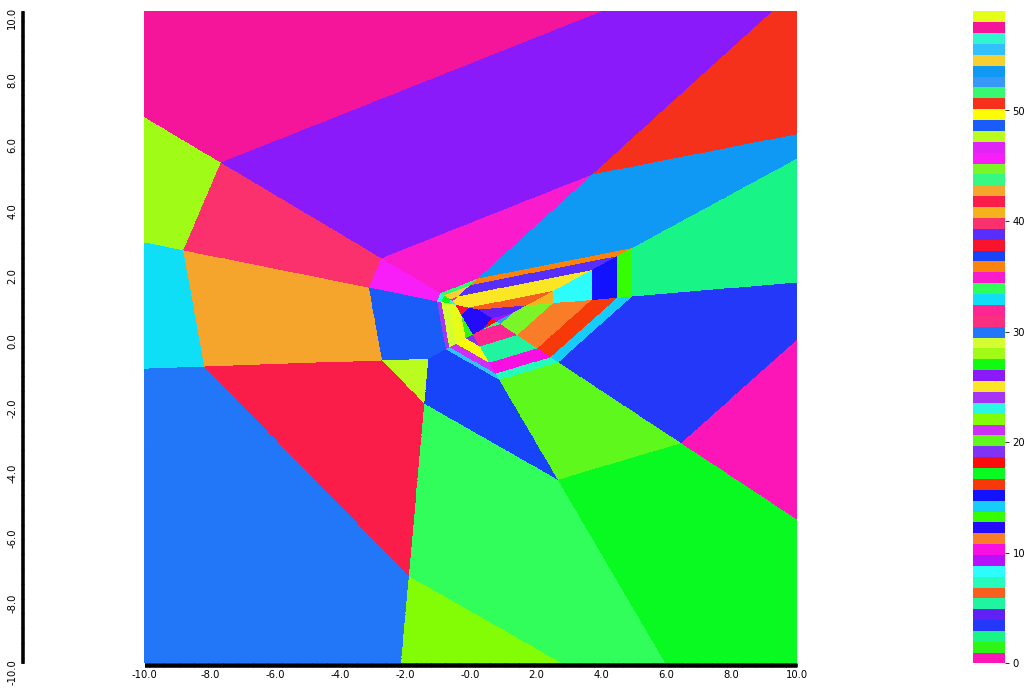

In [267]:
view_2d(x_range, y_range, 0.01, reg)

In [268]:
nb_region = len(set(reg.flatten()))
print(f'{nb_region} regions in the chosen area.')

60 regions in the chosen area.


In [269]:
d, ll = generate_grid([-10,10], [-10, 10], 0.01)
d.requires_grad_(True)

output = arch_2(d, 3, 100)

grad_x, grad_y = compute_grad(output, d, ll)
reg = get_region_fast(grad_x, grad_y)

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:73] data. DefaultCPUAllocator: not enough memory: you tried to allocate 48048012 bytes. Buy new RAM!

In [ ]:
view_2d(x_range, y_range, 0.01, reg)

In [ ]:
nb_region = len(set(reg.flatten()))
print(f'{nb_region} regions in the chosen area.')

### variation of the # of regions w.r.t. the # of layers, given the value of K

In [254]:
def nb_region_arch2(x_range, y_range, step, ls, n_iter):
    avg_nbs = []
    for l in ls:
        stats = torch.empty(n_iter, 1)
        for i in range(n_iter):
            d, ll = generate_grid(x_range, y_range, step)
            d.requires_grad_(True)
            output = arch_2(d, 3, l)
            grad_x, grad_y = compute_grad(output, d, ll)
            reg = get_region_fast(grad_x, grad_y)
            
            stats[i,0] = len(set(reg.flatten()))
        avg_nb = stats.mean(axis = 0)[0].item()
        avg_nbs.append(avg_nb)
        
    return avg_nbs

In [255]:
x_range = [-10, 10]
y_range = [-10, 10]
step = 0.05
ls = np.arange(1,21,1)
ls

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [259]:
nbs_l_1 = nb_region_arch2(x_range, y_range, step, ls, 10)
print('1, finished')
nbs_l_2 = nb_region_arch2(x_range, y_range, step, ls, 100)
print('2, finished')
nbs_l_3 = nb_region_arch2(x_range, y_range, step, ls, 1000)
print('3, finished')

1, finished
2, finished
3, finished


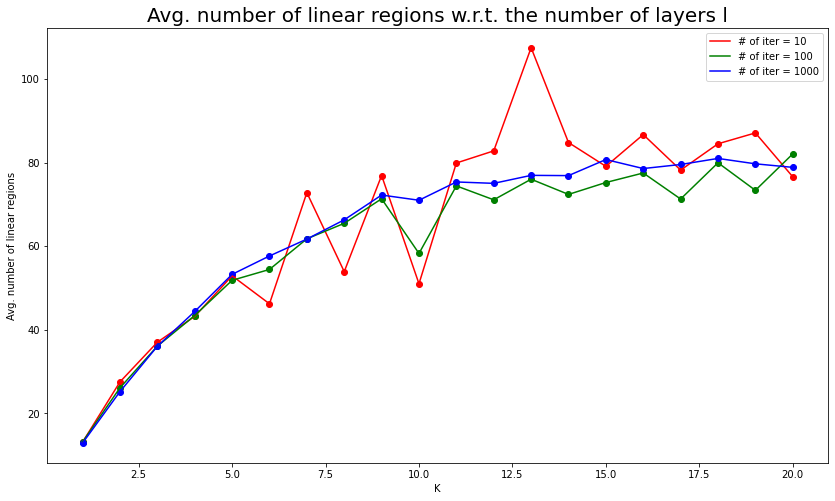

In [260]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ls,nbs_l_1, label = '# of iter = 10',c = 'red')
plt.plot(ls,nbs_l_2, label = '# of iter = 100',c = 'green')
plt.plot(ls,nbs_l_3, label = '# of iter = 1000',c = 'blue')

plt.legend()
plt.scatter(ls, nbs_l_1, c = 'red') 
plt.scatter(ls, nbs_l_2, c = 'green') 
plt.scatter(ls, nbs_l_3, c = 'blue') 

plt.xlabel("K")
plt.ylabel("Avg. number of linear regions")
plt.title("Avg. number of linear regions w.r.t. the number of layers l",fontsize=20)
plt.show()

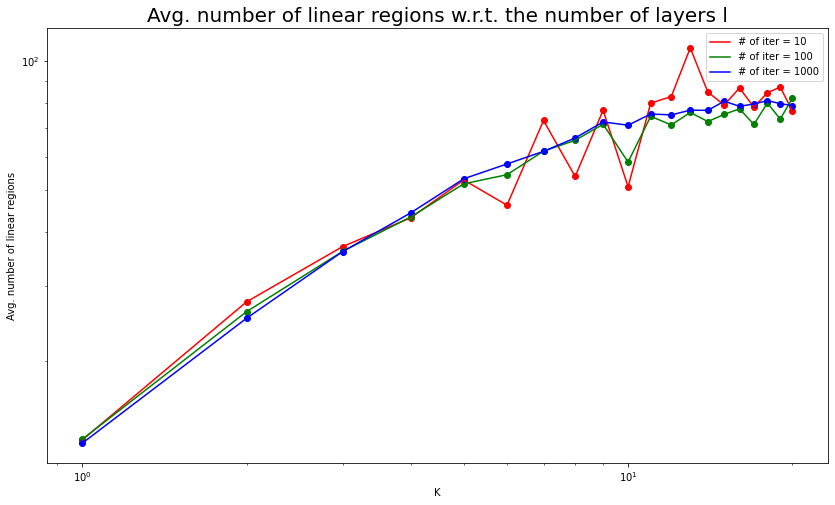

In [261]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ls,nbs_l_1, label = '# of iter = 10',c = 'red')
plt.plot(ls,nbs_l_2, label = '# of iter = 100',c = 'green')
plt.plot(ls,nbs_l_3, label = '# of iter = 1000',c = 'blue')

plt.legend()
plt.scatter(ls, nbs_l_1, c = 'red') 
plt.scatter(ls, nbs_l_2, c = 'green') 
plt.scatter(ls, nbs_l_3, c = 'blue') 

plt.loglog()
plt.xlabel("K")
plt.ylabel("Avg. number of linear regions")
plt.title("Avg. number of linear regions w.r.t. the number of layers l",fontsize=20)
plt.show()

### third architecture
![3rd](./003.png)

In [ ]:
def arch3(d, k, l):
    # start with l = 2
    ghh01 = GHH(d, 1, k)
    ghh02 = GHH(d, 1, k)
    res1 = ghh01(d)
    res2 = ghh02(d)
    res = torch.cat((res1, res2), 1)
    
    for i in range(l-2):
        ghh1 = GHH(res, 2, k)
        ghh2 = GHH(res, 2, k)
        res1 = res.clone()
        res2 = res.clone()
        res1 = ghh1(res1)
        res2 = ghh2(res2)
        res = torch.cat((res1, res2), 1)
        
    ghh_f = GHH(res, 2, k)
    res = res.clone()
    output = ghh_f(res)
    return output

In [ ]:
def nb_region_arch3(ls, n_iter, scale, nb, save_name1, save_name2):
    avg_nbs = []
    stds = []
    for l in ls:
        stats = torch.empty(n_iter, 1)
        for i in range(n_iter):
            d = torch.linspace(-1*scale, scale, nb)
            d = d.reshape(-1, 1)
            d.requires_grad_(True)
            output = arch_3(d, 3, l)
            output.backward(torch.ones_like(output))
            grad = d.grad.numpy().reshape(-1)
            
            stats[i,0] = len(set(grad))
        avg_nb = stats.mean(axis = 0)[0].item()
        std = stats.std(axis = 0)[0].item()
        avg_nbs.append(avg_nb)
        stds.append(std)
        print(f'{l}, finished.')
    # save the result
    avg_nbs_tosave = np.array(avg_nbs)
    stds_tosave = np.array(stds)
    np.save(save_name1, avg_nbs_tosave)
    np.save(save_name2, stds_tosave)
    return avg_nbs, stds

In [ ]:
ls = np.arange(0,21,2)
ls[0] = 1
ls

In [ ]:
nbs, stds = nb_region_arch3(ls, 1000, 20, 2001, 'arch3/nbs.npy', 'arch3/stds.npy')

### fourth architecture
![4th](./004.png)

In [ ]:
def arch4(d,k,l):
    